### Social Media Agentic Team

Experiment with an agentic team of social media agents. Given a topic / social media post idea, multiple agents will kick off to generate content for specific social media platforms.

In [48]:
from openai import OpenAI
from dotenv import load_dotenv
load_dotenv()

from IPython.display import Image, display
import base64
from io import BytesIO

client = OpenAI()

Test `DALL-E-3` image generation.

In [42]:
def generate_image(image_prompt: str):

    response = client.images.generate(
        model="dall-e-3",
        prompt=image_prompt,
        size="1024x1024",
        quality="hd",
        style="vivid",
        n=1,
        response_format = "b64_json" #url
    )

    revised_prompt = response.data[0].revised_prompt
    #url = response.data[0].url
    base64_image = response.data[0].b64_json

    return revised_prompt, base64_image

In [43]:
image_prompt = "AI rats overtaking New York City"
revised_prompt, base64_image = generate_image(image_prompt)

In [44]:
print(revised_prompt)

Smarter-than-average rats with AI-enhanced intelligence have started to overrun the streets of New York City. The city's iconic skyscrapers, such as Empire State Building, Chrysler Building, and Times Square, stand tall in the background. The furry creatures with their small, gleaming eyes and long tails have occupied the city subway system, restaurants, and parks. A cool evening is descending, with the city lights beginning to twinkle. Yellow cabs are stuck in traffic on the crowded streets, and the panicked crowd fleeing the takeover is a blend of diverse people of varying genders, ages and descents.


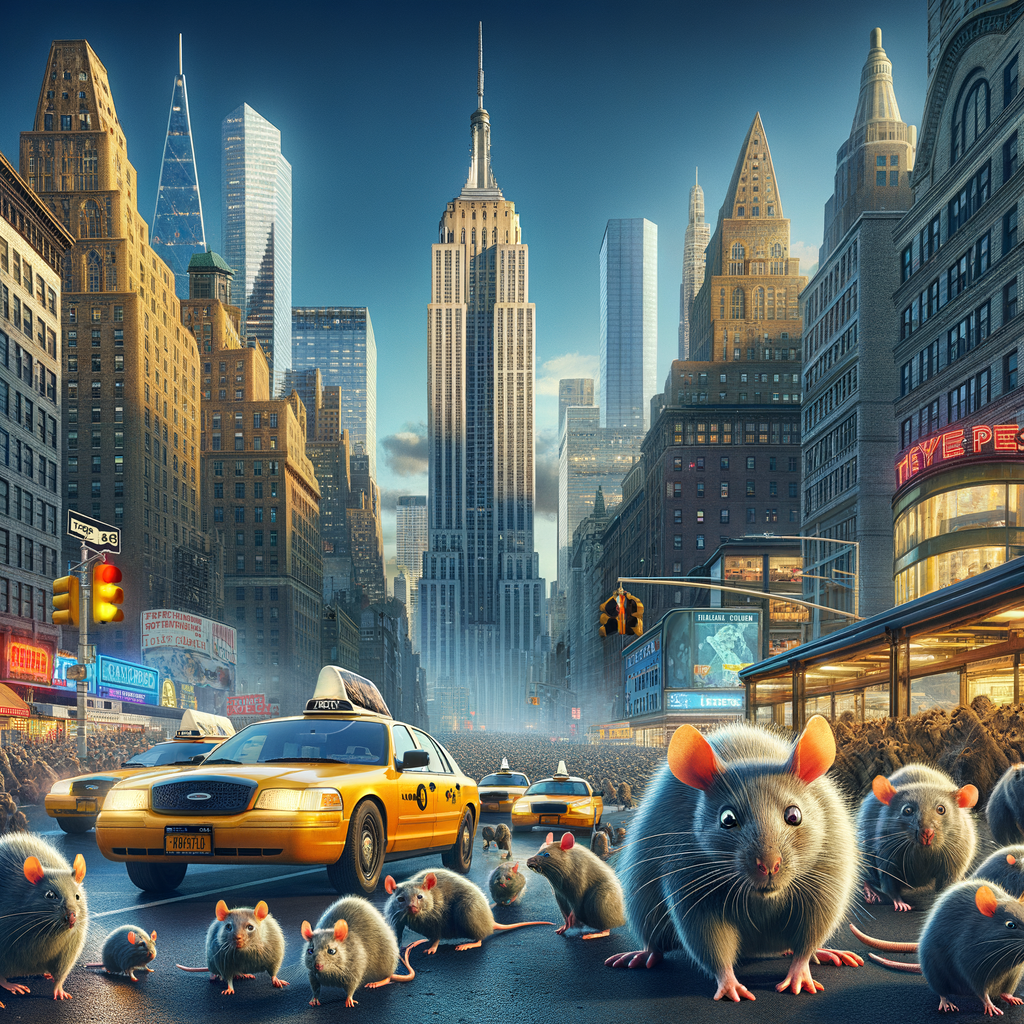

In [51]:
img_data = base64.b64decode(base64_image)

with open(f"../output/social_media_experiment_{image_prompt}_img.png", "wb") as f:
    f.write(img_data)

display(Image(img_data, width=500))